In [1]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.discriminant_analysis import StandardScaler

seg_train = Path.cwd() / "seg_train"
seg_test = Path.cwd() / "seg_test"

categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

x_train = []

y_train = []
x_test = []
y_test = []
img_size = (32, 32)


for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(seg_train, category)):
        img_path = os.path.join(seg_train, category, file)
        img = resize(imread(img_path),img_size)
        x_train.append(img)
        y_train.append(category_idx)
    for file in os.listdir(os.path.join(seg_test, category)):
        img_path = os.path.join(seg_test, category, file)
        img = resize(imread(img_path), img_size)
        x_test.append(img)
        y_test.append(category_idx)

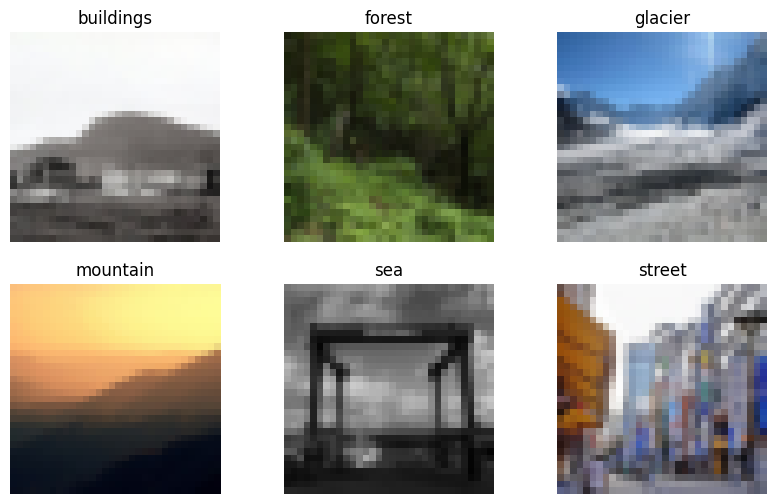

In [3]:
plt.figure(figsize=(10, len(category)))
for category_idx, category in enumerate(categories):
    img_index = y_train.index(category_idx)
    plt.subplot(2,3,category_idx+1)
    plt.imshow(x_train[img_index])
    plt.axis("off")
    plt.title(category)
plt.show()  

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred, target_names=categories))

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

              precision    recall  f1-score   support

   buildings       0.50      0.57      0.53       437
      forest       0.78      0.80      0.79       474
     glacier       0.62      0.64      0.63       553
    mountain       0.63      0.65      0.64       525
         sea       0.60      0.40      0.48       510
      street       0.64      0.72      0.68       501

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



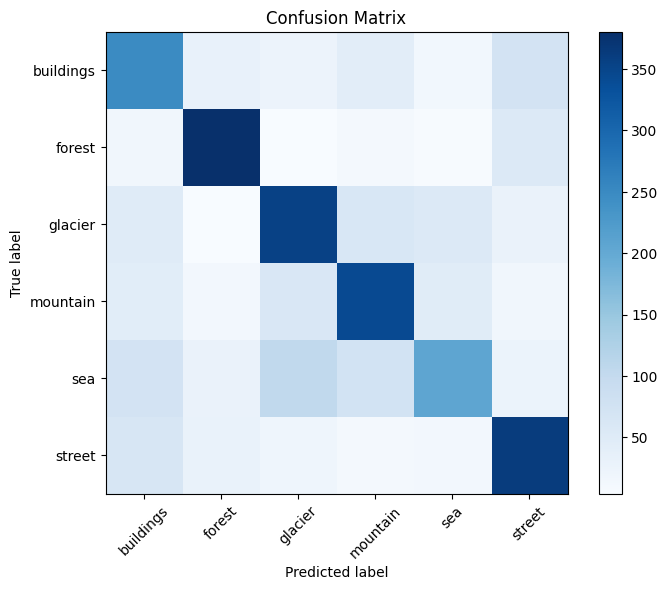

              precision    recall  f1-score   support

   buildings       0.51      0.43      0.47       437
      forest       0.70      0.81      0.75       474
     glacier       0.58      0.62      0.60       553
    mountain       0.59      0.69      0.64       525
         sea       0.59      0.43      0.50       510
      street       0.65      0.66      0.66       501

    accuracy                           0.61      3000
   macro avg       0.60      0.61      0.60      3000
weighted avg       0.61      0.61      0.60      3000



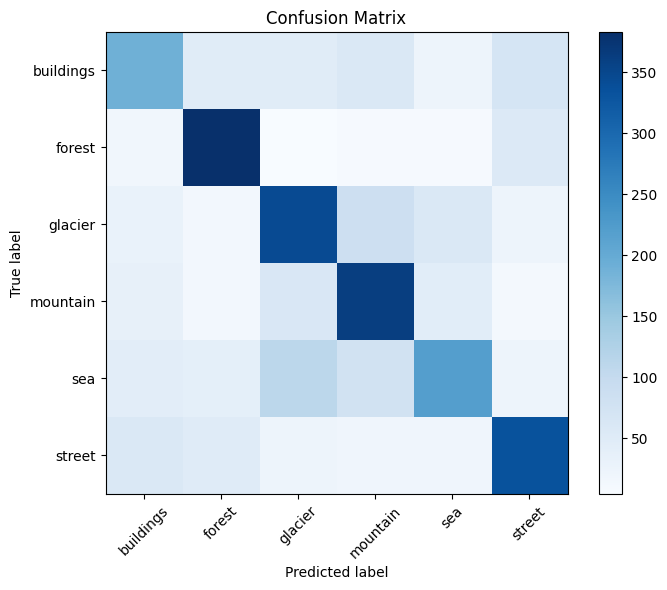

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

x_train_svc = []
x_test_svc = []
for img in x_train:
    x_train_svc.append(img.flatten())
for img in x_test:
    x_test_svc.append(img.flatten())

scaler = StandardScaler()
x_train_svc = scaler.fit_transform(np.asarray(x_train_svc))
y_train_svc = np.asarray(y_train)
x_test_svc = scaler.fit_transform(np.asarray(x_test_svc))
y_test_svc = np.asarray(y_test)

classifiers = [
    SVC(gamma=0.001),
    #DecisionTreeClassifier(max_depth=12),
    RandomForestClassifier(),
    ]

for classifier in classifiers:
    classifier.fit(x_train_svc, y_train_svc)
    y_pred_svc = classifier.predict(x_test_svc)
    plot_confusion_matrix(y_test_svc, y_pred_svc)

Epoch 1/30


c:\Users\radek\Desktop\USU\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.3811 - loss: 1.8250 - val_accuracy: 0.5160 - val_loss: 1.2940
Epoch 2/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5215 - loss: 1.2305 - val_accuracy: 0.5347 - val_loss: 1.2145
Epoch 3/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5565 - loss: 1.1507 - val_accuracy: 0.5627 - val_loss: 1.1389
Epoch 4/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5747 - loss: 1.1083 - val_accuracy: 0.5440 - val_loss: 1.1802
Epoch 5/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5921 - loss: 1.0624 - val_accuracy: 0.5580 - val_loss: 1.1234
Epoch 6/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6060 - loss: 1.0255 - val_accuracy: 0.5797 - val_loss: 1.0971
Epoch 7/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6131 - loss: 1.0056 - val_accuracy: 0.5947 - val_loss: 1.0629
Epoch 8/30
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6323 - loss: 0.9824 - val_accurac

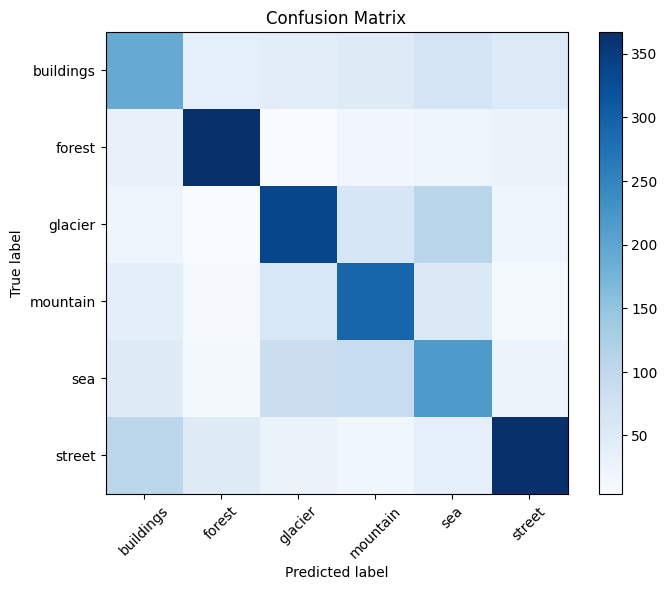

In [35]:
import tensorflow as tf
from keras import models, layers

x_train_nn = np.asarray(x_train)
x_test_nn = np.asarray(x_test)
y_train_nn = tf.keras.utils.to_categorical(y_train, len(categories))
y_test_nn = tf.keras.utils.to_categorical(y_test, len(categories))

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(units = 1024, activation="relu"),
    layers.Dense(units = 512, activation="relu"),
    layers.Dense(len(categories), activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train_nn, y_train_nn, epochs=30, validation_data=(x_test_nn, y_test_nn)
)
y_pred_nn = model.predict(x_test_nn)


y_pred_nn = np.argmax(y_pred_nn, axis=1)
y_test_nn = np.argmax(y_test_nn, axis=1)
plot_confusion_matrix(y_pred_nn, y_test_nn)

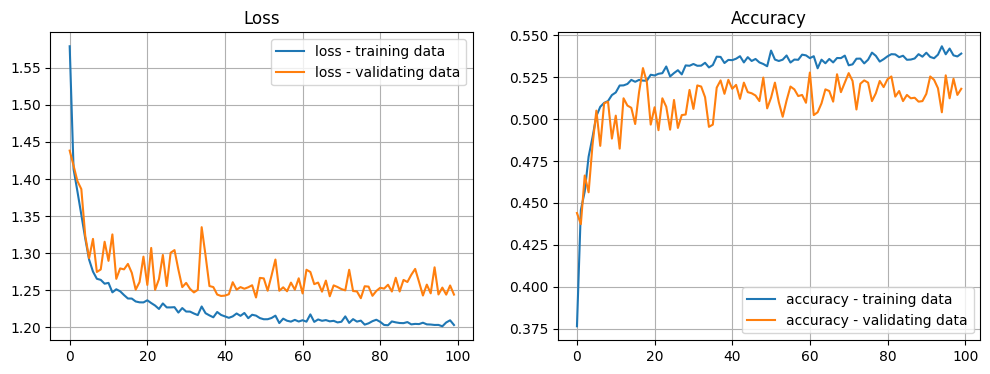

In [34]:

plt.rcParams["figure.figsize"] = [12, 4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history["loss"], label="loss - training data")
axis[0].plot(history.history["val_loss"], label="loss - validating data")
axis[0].grid()
axis[0].set_title("Loss")
axis[0].legend()


axis[1].plot(history.history["accuracy"], label="accuracy - training data")
axis[1].plot(history.history["val_accuracy"], label="accuracy - validating data")
axis[1].grid()
axis[1].set_title("Accuracy")
axis[1].legend()